In [1]:
from collections import defaultdict
import glob
from itertools import groupby
import operator
import os
import re

import numpy as np
import pandas as pd
import pickle
import random
import sparse
#import tensorly as tl
#import tensorly.decomposition as decomp
import sktensor
import urllib3
#import wget

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pylab.rcParams['figure.figsize'] = (20, 10)

In [3]:
matplotlib.rcParams.update({'font.size': 14})

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
from cp_orth import orth_als

In [4]:
def get_df():
    projdir = '/mnt/permanent/home/makrai/project/verb-tensor/verb/'
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, 'tensor/0/ktensor_*.pkl')):
        weight, cutoff, dim = os.path.splitext(os.path.basename(filen))[0].rsplit('_', 2)
        _, weight = weight.split('_', 1)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        
        tabular.append((weight, cutoff, dim, ktensor.shape, fit, sum(exectimes)))
    return pd.DataFrame(tabular, columns=['weight', 'cutoff', 'dim', 'shape', 'fit', 'time'])

In [5]:
df = get_df()

In [6]:
df_fixeddim = df[df.dim==32]

,weight,cutoff,dim,shape,fit,time
21,iact_sali,5,32,"(83681, 16706, 77883)",0.281449,39772.789746
24,log_freq,5,32,"(83681, 16706, 77883)",0.270411,1546.828146
39,dice_sali,5,32,"(83681, 16706, 77883)",0.249089,27830.025852
19,iact_info,5,32,"(83681, 16706, 77883)",0.185538,33675.880752
41,log_dice,5,32,"(83681, 16706, 77883)",0.151966,20245.555230
18,salience,5,32,"(83681, 16706, 77883)",0.043454,9395.487550
23,pmi,5,32,"(83681, 16706, 77883)",0.029208,4942.228064


In [9]:
weights = df_fixeddim.sort_values('fit', ascending=False).weight

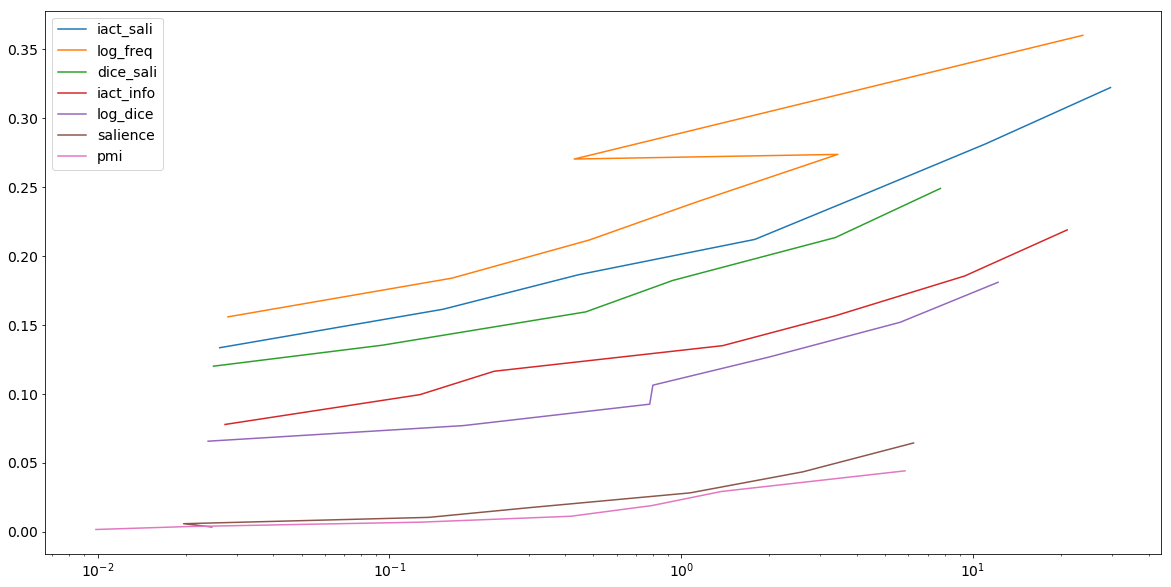

In [29]:
for weight in weights:
    df_w = df[df.weight==weight].sort_values('dim', ascending=False)
    plt.plot(#df_w.dim, 
        df_w.time/60/60,
        df_w.fit)
        
#for i, ser in df[['fit', 'time', 'weight']].iterrows():
#    plt.annotate(ser.weight, (ser.fit, ser.time))
#plt.colorbar()
plt.xscale('log')
_ = plt.legend(weights)